In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 라이프러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프상에서 한글을 나타내기 위해 korean_mat 설치
! pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 15.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df_copy_18 = pd.read_csv('/content/drive/MyDrive/download/df_copy_2018')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # 단어들의 출현 빈도로 여러 문서를 벡터화하기 위해 cv를 불러온다
doc_cv = cv.fit_transform(df_copy_18['doc'])
cv_cols = cv.get_feature_names_out()
pd.DataFrame(doc_cv.toarray(),columns=cv_cols).sum().sort_values()

정략          1
주크          1
포퍼          1
주태          1
서울구치소       1
         ... 
생각       3971
사람       4352
아이       4618
보다       4677
국민       5434
Length: 36951, dtype: int64

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation # 잠재 디리클레 기법 적용

NUM_TOPICS = 15 # 카테고리는 15개로 설정
LDA_model = LatentDirichletAllocation(n_components=NUM_TOPICS,random_state=42)

LDA_model.fit(doc_cv)

LatentDirichletAllocation(n_components=15, random_state=42)

In [ ]:
# 문서의 길이를 계산
def cal_len(x):
    return len(x)

df_copy_18['len_doc'] = df_copy_18['doc'].apply(cal_len)
df_copy_18

,category,begin,end,content,num_agree,petition_idx,status,title,replies,doc,len_doc
0,기타,2018-01-01,2018-01-31,당시 김샘 학생이 시위하던 곳은 금지된 구역이 아니었으며 때문에 공동주거침입 혐의로...,1852,77840,청원종료,위안부 합의 무효를 위해 힘든 재판을 견디고 있을 김샘학생의 무죄선고를 청원합니다,NaN,위안부 합의 무효 위해 힘드다 재판 견디다 김샘 학생 무죄 선고 청원 당시 김샘 학...,161
1,문화/예술/체육/언론,2018-01-01,2018-01-31,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니...,1603,78203,청원종료,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니다.,NaN,간호조무사 평창올림픽 의료 봉사 지원 반대 의료인 대체 것 청원 간호조무사 평창올림...,1102
2,일자리,2018-01-01,2018-01-31,안녕하세요. 정권이 바뀌고부터 대통령님과 정부에서 추진하시는 비정규직의 정규직화정책...,724,78221,청원종료,비정규직의 정규직화에 대한 기준을 다시 재고하여주십시오. 무분별한 정규직화에 반대...,NaN,비정규직 정규직 화 대한 기준 다시 재고 무분별 정규직 화 반대 안녕하다 정권 바뀌...,812
3,인권/성평등,2018-01-02,2018-02-01,동성결혼을 인정해 주십시오. 어른들은 모든 아이들에게 가르칩니다. 틀린 것과 다른 ...,8032,78244,청원종료,동성결혼을 합법화 해주세요.,NaN,동성결혼 합법 화 해주다 동성결혼 인정 주 십 시오 어른 들 모든 아이 들 가르치다...,895
4,육아/교육,2018-01-02,2018-02-01,안녕하십니까.. 저는 현재 보육교사로 근무하고 있는 박민정 입니다. 늦은 나이에 아...,6389,78281,청원종료,보육교사 권리보장,NaN,보육 교사 권리 보장 안녕하십니까 저 현재 보육 교사 근무 박민정 늦다 나이 아 사...,1564
...,...,...,...,...,...,...,...,...,...,...,...
4349,보건복지,2018-12-31,2019-01-30,제가 요청하는건 두가지입니다 1. 만40세에 받는 유방암 검진나이를 낮춰주세요 2....,528,483517,청원종료,유방암 국가검진 더 일찍 받을수 있게 해주세요,NaN,유방암 국가 검진 더 일찍 해주다 제 요청 두 가지 1 만 40 세 유방암 검다 낮...,680
4350,교통/건축/국토,2018-12-31,2019-01-30,의정부 민락신도시는 인구 10만 이상이 거주하는 거대 도시로 계획되어 개발되고 있습...,1276,483568,청원종료,민락2지구 7호선 정거장 설치에 관한 청원,NaN,민락 2 지구 7 호선 정거장 설치 관 청원 의정부 민락 신도시 인구 10만 이상 ...,616
4351,인권/성평등,2018-12-31,2019-01-30,2018년 12월 29일 오전 10시 즈음 수원시 권선구 소재 초등학교 인근에서 발...,2241,483769,청원종료,"20대 정신 이상자, 85세 할머니를 뇌사에 빠트리다",NaN,20 대다 정신 이상자 85 세 할머니 뇌사 빠트리 2018년 12월 29일 오전 ...,669
4352,보건복지,2018-12-31,2019-01-30,"2019년 새해로 넘어가는 마지막 날, 강북 삼성병원에서 근무하시던 정신과 교수님께...",69153,483805,청원종료,강북 삼성병원 의료진 사망사건에 관련한 의료 안정성을 위한 청원,NaN,강북 삼성 병원 의료 진 사망 사건 관련 의료 안정 성 위 청원 2019년 새해 넘...,875


<Axes: xlabel='len_doc', ylabel='Count'>

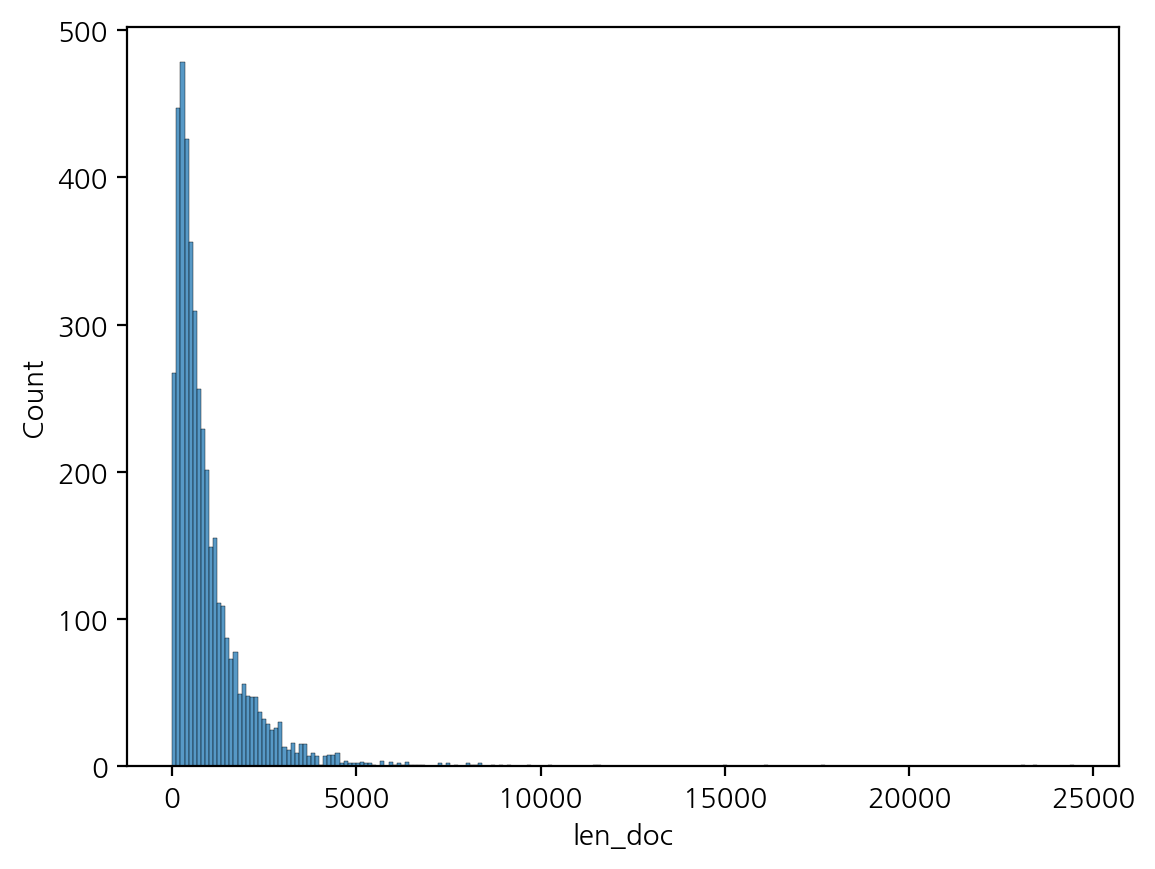

In [ ]:
# len_doc의 분포를 살펴보기
import seaborn as sns
import numpy as np
sns.histplot(data=df_copy_18,x='len_doc')



In [ ]:
df_copy_18['num_agree'].describe()

count    4.354000e+03
mean     9.773226e+03
std      4.092399e+04
min      5.010000e+02
25%      7.620000e+02
50%      1.454500e+03
75%      3.861750e+03
max      1.192049e+06
Name: num_agree, dtype: float64

#### 로지스틱 회귀를 이용한 청원 돌파 확률 분류:
*   청원 기준 재설정: 5000, 50000,100000,200000

#### 1. 청원 답변 기준이 5000

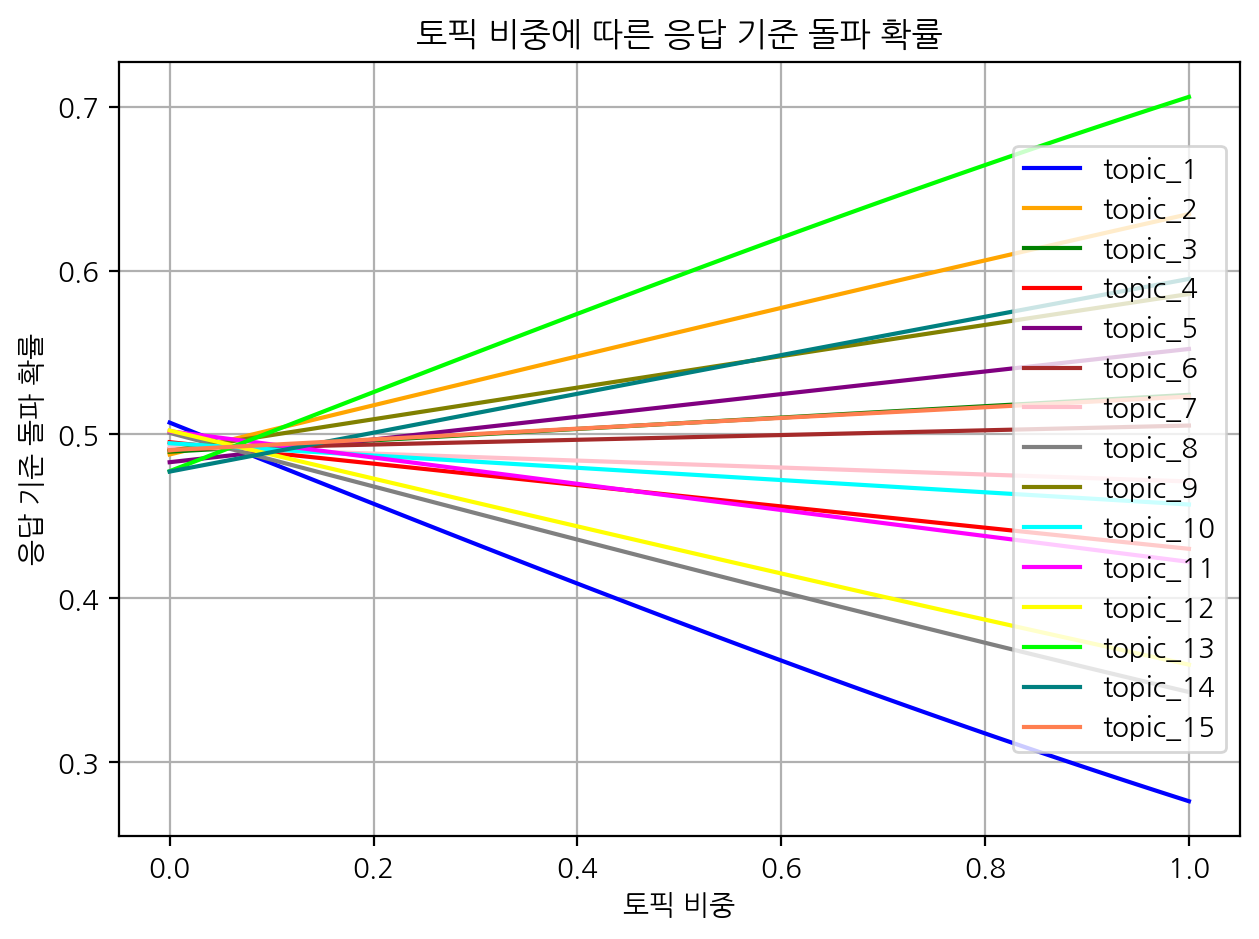

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid 함수

colors = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'magenta', 'yellow', 'lime', 'teal', 'coral'
]

# 청원 답변 기준 5000
df_copy_18['response_achieved'] = np.where(df_copy_18['num_agree'] >= 5000, 1, 0)

# 토픽 칼럼 설정
df_copy_18 = df_copy_18.reset_index(drop=True)
# 각 문서의 토픽 비중 추출
X_topics = LDA_model.transform(doc_cv)

# 각 청원 문서의 토픽 비중을 데이터프레임으로 변환
NUM_TOPICS = X_topics.shape[1]
topic_columns = [f'topic_{i}' for i in range(1, NUM_TOPICS + 1)]
topics_df = pd.DataFrame(X_topics, columns=topic_columns)

# 청원 데이터와 토픽 비중 합치기
data = pd.concat([topics_df, df_copy_18[['response_achieved', 'len_doc']]], axis=1)

# 독립변수(X)와 종속변수(y) 설정
data['len_doc'] = np.log(data['len_doc'] + 1)
X = data[topic_columns + ['len_doc']]
y = data['response_achieved']

# 클래스 가중치 부여하여 로지스틱 회귀 모델 적합
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X, y)

# 각 토픽에 대해 다양한 비중 값 설정
topic_values = np.linspace(0, 1, 100)

# 각 토픽에 대한 예측 확률 계산 및 시각화
for i, topic in enumerate(topic_columns):
    # 다른 토픽의 비중은 평균값으로 설정
    X_test = np.tile(X.mean(axis=0).values, (100, 1))
    X_test[:, i] = topic_values

    # 예측 확률 계산
    logit_values = log_reg.intercept_ + np.dot(X_test, log_reg.coef_.T)
    y_prob = expit(logit_values)

    # 각 서브플롯에 그래프 그리기
    plt.plot(topic_values, y_prob, label=topic,color=colors[i])
    plt.xlabel('토픽 비중')
    plt.ylabel('응답 기준 돌파 확률')
    plt.title(f'토픽 비중에 따른 응답 기준 돌파 확률')
    plt.legend()
    plt.grid(True)

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()


In [ ]:
topics_df

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15
0,0.001389,0.001389,0.001389,0.001389,0.001389,0.001389,0.425459,0.001389,0.001389,0.001389,0.253834,0.001389,0.304041,0.001389,0.001389
1,0.000242,0.000242,0.000242,0.572174,0.000242,0.010777,0.000242,0.000242,0.000242,0.257049,0.000242,0.000242,0.000242,0.157342,0.000242
2,0.000322,0.000322,0.693702,0.168167,0.000322,0.000322,0.000322,0.000322,0.000322,0.000322,0.000322,0.000322,0.000322,0.000322,0.134267
3,0.000310,0.000310,0.415066,0.019078,0.143547,0.000310,0.000310,0.000310,0.000310,0.000310,0.297240,0.000310,0.121968,0.000310,0.000310
4,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.000173,0.898296,0.000173,0.099453,0.000173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,0.000394,0.000394,0.000394,0.000394,0.000394,0.000394,0.000394,0.000394,0.000394,0.000394,0.360780,0.144445,0.010365,0.480071,0.000394
4350,0.994017,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427,0.000427
4351,0.042538,0.000388,0.000388,0.032460,0.304397,0.000388,0.000388,0.000388,0.000388,0.000388,0.018704,0.084633,0.000388,0.513780,0.000388
4352,0.000310,0.000310,0.000310,0.104990,0.000310,0.000310,0.068712,0.000310,0.000310,0.000310,0.000310,0.000310,0.121135,0.701752,0.000310


#### 3. 청원 기준 200000

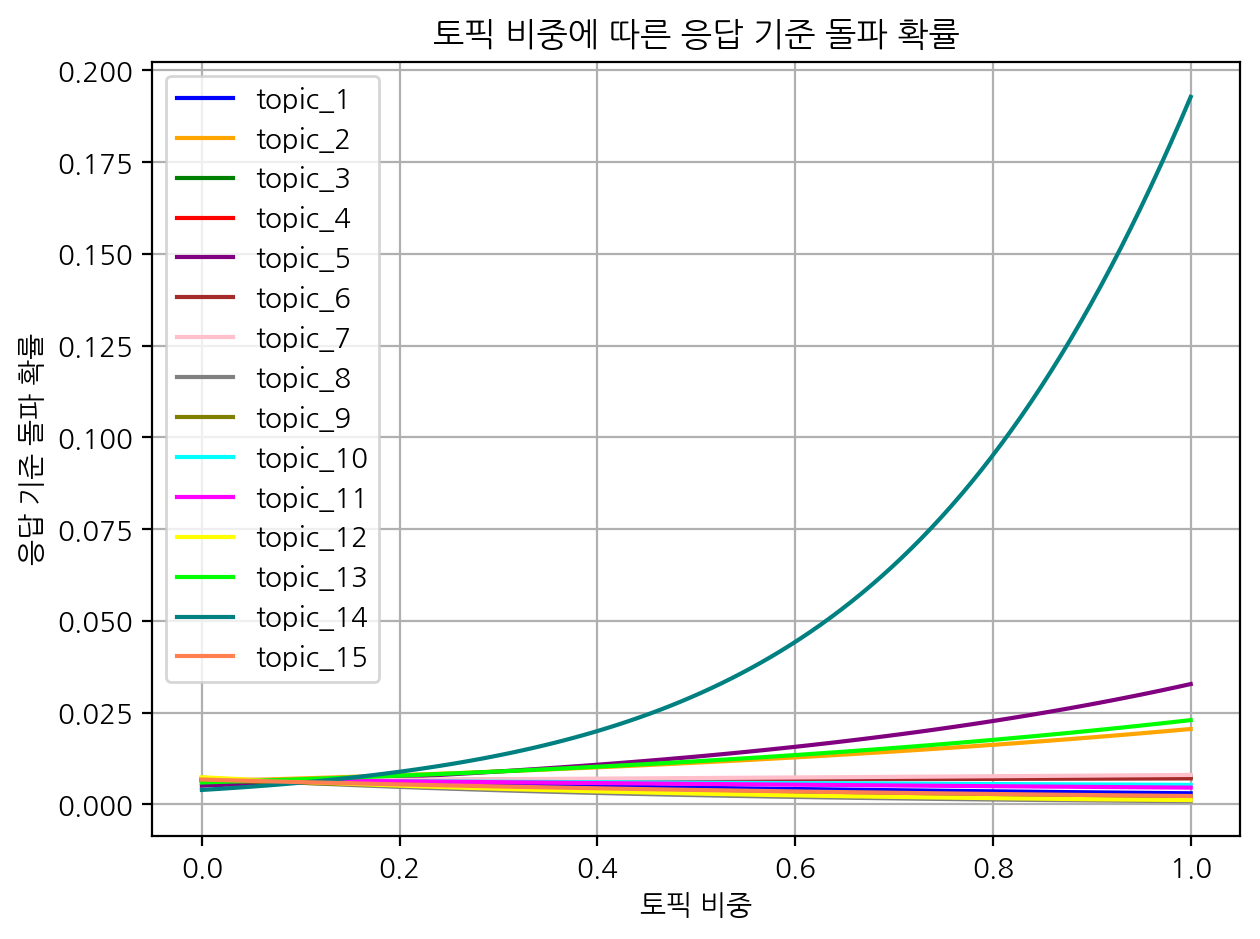

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid 함수

colors = [
    'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'magenta', 'yellow', 'lime', 'teal', 'coral'
]

# 청원 답변 기준 5000
df_copy_18['response_achieved'] = np.where(df_copy_18['num_agree'] >= 200000, 1, 0)

# 토픽 칼럼 설정
df_copy_18 = df_copy_18.reset_index(drop=True)
# 각 문서의 토픽 비중 추출
X_topics = LDA_model.transform(doc_cv)

# 각 청원 문서의 토픽 비중을 데이터프레임으로 변환
NUM_TOPICS = X_topics.shape[1]
topic_columns = [f'topic_{i}' for i in range(1, NUM_TOPICS + 1)]
topics_df = pd.DataFrame(X_topics, columns=topic_columns)

# 청원 데이터와 토픽 비중 합치기
data = pd.concat([topics_df, df_copy_18[['response_achieved', 'len_doc']]], axis=1)

# 독립변수(X)와 종속변수(y) 설정
data['len_doc'] = np.log(data['len_doc'] + 1)
X = data[topic_columns + ['len_doc']]
y = data['response_achieved']

# 클래스 가중치 부여하여 로지스틱 회귀 모델 적합
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X, y)

# 각 토픽에 대해 다양한 비중 값 설정
topic_values = np.linspace(0, 1, 100)

# 각 토픽에 대한 예측 확률 계산 및 시각화
for i, topic in enumerate(topic_columns):
    # 다른 토픽의 비중은 평균값으로 설정
    X_test = np.tile(X.mean(axis=0).values, (100, 1))
    X_test[:, i] = topic_values

    # 예측 확률 계산
    logit_values = log_reg.intercept_ + np.dot(X_test, log_reg.coef_.T)
    y_prob = expit(logit_values)

    # 각 서브플롯에 그래프 그리기
    plt.plot(topic_values, y_prob, label=topic,color=colors[i])
    plt.xlabel('토픽 비중')
    plt.ylabel('응답 기준 돌파 확률')
    plt.title(f'토픽 비중에 따른 응답 기준 돌파 확률')
    plt.legend()
    plt.grid(True)

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()


In [ ]:
pd.options.display.max_rows = 100
index_list = df_copy_18[df_copy_18['num_agree'] > 200000].index.tolist()
for ind in index_list:
    print(X.iloc[ind,:-1])


topic_1     0.009524
topic_2     0.009524
topic_3     0.009524
topic_4     0.009524
topic_5     0.866667
topic_6     0.009524
topic_7     0.009524
topic_8     0.009524
topic_9     0.009524
topic_10    0.009524
topic_11    0.009524
topic_12    0.009524
topic_13    0.009524
topic_14    0.009524
topic_15    0.009524
Name: 20, dtype: float64
topic_1     0.013333
topic_2     0.013333
topic_3     0.438827
topic_4     0.013333
topic_5     0.013333
topic_6     0.013333
topic_7     0.013333
topic_8     0.013333
topic_9     0.013333
topic_10    0.013333
topic_11    0.013333
topic_12    0.013333
topic_13    0.387840
topic_14    0.013333
topic_15    0.013333
Name: 45, dtype: float64
topic_1     0.605817
topic_2     0.006667
topic_3     0.006667
topic_4     0.006667
topic_5     0.307516
topic_6     0.006667
topic_7     0.006667
topic_8     0.006667
topic_9     0.006667
topic_10    0.006667
topic_11    0.006667
topic_12    0.006667
topic_13    0.006667
topic_14    0.006667
topic_15    0.006667
Name:

In [ ]:
df_topic = pd.concat([df_copy_18,X],axis=1)
df_topic[df_topic['num_agree'] > 5000]
df_topic = df_topic[['category','num_agree','doc','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9','topic_10','topic_11','topic_12','topic_13','topic_14','topic_15']]
df_topic.describe()

,num_agree,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15
count,4.354000e+03,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000,4354.000000
mean,9.773226e+03,0.062227,0.026635,0.066345,0.053439,0.125957,0.058146,0.036179,0.055945,0.018864,0.076001,0.126836,0.072169,0.058867,0.121819,0.040572
std,4.092399e+04,0.160256,0.102884,0.168552,0.137105,0.222966,0.153624,0.125374,0.153251,0.078651,0.194478,0.222574,0.177996,0.145265,0.221349,0.131465
min,5.010000e+02,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000022,0.000011,0.000011
25%,7.620000e+02,0.000281,0.000240,0.000306,0.000298,0.000322,0.000271,0.000250,0.000290,0.000241,0.000253,0.000345,0.000290,0.000294,0.000386,0.000239
50%,1.454500e+03,0.000667,0.000513,0.000709,0.000709,0.000980,0.000629,0.000538,0.000660,0.000505,0.000575,0.001212,0.000705,0.000709,0.001258,0.000513
75%,3.861750e+03,0.006667,0.001235,0.006061,0.005556,0.169439,0.003704,0.001418,0.003897,0.001170,0.003139,0.169261,0.011968,0.015819,0.151469,0.001418
max,1.192049e+06,0.996190,0.998457,0.998596,0.998377,0.998860,0.996368,0.999197,0.998975,0.998802,0.997971,0.997746,0.998696,0.999840,0.999290,0.997407


#### 분류 성능 테스트

In [ ]:
import pandas as pd
df_copy_18 = pd.read_csv('/content/drive/MyDrive/download/df_copy_2018')

# 문서의 길이를 계산
def cal_len(x):
    return len(x)

df_copy_18['len_doc'] = df_copy_18['doc'].apply(cal_len)
df_copy_18

,category,begin,end,content,num_agree,petition_idx,status,title,replies,doc,len_doc
0,기타,2018-01-01,2018-01-31,당시 김샘 학생이 시위하던 곳은 금지된 구역이 아니었으며 때문에 공동주거침입 혐의로...,1852,77840,청원종료,위안부 합의 무효를 위해 힘든 재판을 견디고 있을 김샘학생의 무죄선고를 청원합니다,NaN,위안부 합의 무효 위해 힘드다 재판 견디다 김샘 학생 무죄 선고 청원 당시 김샘 학...,161
1,문화/예술/체육/언론,2018-01-01,2018-01-31,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니...,1603,78203,청원종료,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니다.,NaN,간호조무사 평창올림픽 의료 봉사 지원 반대 의료인 대체 것 청원 간호조무사 평창올림...,1102
2,일자리,2018-01-01,2018-01-31,안녕하세요. 정권이 바뀌고부터 대통령님과 정부에서 추진하시는 비정규직의 정규직화정책...,724,78221,청원종료,비정규직의 정규직화에 대한 기준을 다시 재고하여주십시오. 무분별한 정규직화에 반대...,NaN,비정규직 정규직 화 대한 기준 다시 재고 무분별 정규직 화 반대 안녕하다 정권 바뀌...,812
3,인권/성평등,2018-01-02,2018-02-01,동성결혼을 인정해 주십시오. 어른들은 모든 아이들에게 가르칩니다. 틀린 것과 다른 ...,8032,78244,청원종료,동성결혼을 합법화 해주세요.,NaN,동성결혼 합법 화 해주다 동성결혼 인정 주 십 시오 어른 들 모든 아이 들 가르치다...,895
4,육아/교육,2018-01-02,2018-02-01,안녕하십니까.. 저는 현재 보육교사로 근무하고 있는 박민정 입니다. 늦은 나이에 아...,6389,78281,청원종료,보육교사 권리보장,NaN,보육 교사 권리 보장 안녕하십니까 저 현재 보육 교사 근무 박민정 늦다 나이 아 사...,1564
...,...,...,...,...,...,...,...,...,...,...,...
4349,보건복지,2018-12-31,2019-01-30,제가 요청하는건 두가지입니다 1. 만40세에 받는 유방암 검진나이를 낮춰주세요 2....,528,483517,청원종료,유방암 국가검진 더 일찍 받을수 있게 해주세요,NaN,유방암 국가 검진 더 일찍 해주다 제 요청 두 가지 1 만 40 세 유방암 검다 낮...,680
4350,교통/건축/국토,2018-12-31,2019-01-30,의정부 민락신도시는 인구 10만 이상이 거주하는 거대 도시로 계획되어 개발되고 있습...,1276,483568,청원종료,민락2지구 7호선 정거장 설치에 관한 청원,NaN,민락 2 지구 7 호선 정거장 설치 관 청원 의정부 민락 신도시 인구 10만 이상 ...,616
4351,인권/성평등,2018-12-31,2019-01-30,2018년 12월 29일 오전 10시 즈음 수원시 권선구 소재 초등학교 인근에서 발...,2241,483769,청원종료,"20대 정신 이상자, 85세 할머니를 뇌사에 빠트리다",NaN,20 대다 정신 이상자 85 세 할머니 뇌사 빠트리 2018년 12월 29일 오전 ...,669
4352,보건복지,2018-12-31,2019-01-30,"2019년 새해로 넘어가는 마지막 날, 강북 삼성병원에서 근무하시던 정신과 교수님께...",69153,483805,청원종료,강북 삼성병원 의료진 사망사건에 관련한 의료 안정성을 위한 청원,NaN,강북 삼성 병원 의료 진 사망 사건 관련 의료 안정 성 위 청원 2019년 새해 넘...,875


In [ ]:
df_copy_18

,category,begin,end,content,num_agree,petition_idx,status,title,replies,doc,len_doc
0,기타,2018-01-01,2018-01-31,당시 김샘 학생이 시위하던 곳은 금지된 구역이 아니었으며 때문에 공동주거침입 혐의로...,1852,77840,청원종료,위안부 합의 무효를 위해 힘든 재판을 견디고 있을 김샘학생의 무죄선고를 청원합니다,NaN,위안부 합의 무효 위해 힘드다 재판 견디다 김샘 학생 무죄 선고 청원 당시 김샘 학...,161
1,문화/예술/체육/언론,2018-01-01,2018-01-31,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니...,1603,78203,청원종료,간호조무사의 평창올림픽 의료봉사 지원 반대하고 '의료인'으로 대체하는 것을 청원합니다.,NaN,간호조무사 평창올림픽 의료 봉사 지원 반대 의료인 대체 것 청원 간호조무사 평창올림...,1102
2,일자리,2018-01-01,2018-01-31,안녕하세요. 정권이 바뀌고부터 대통령님과 정부에서 추진하시는 비정규직의 정규직화정책...,724,78221,청원종료,비정규직의 정규직화에 대한 기준을 다시 재고하여주십시오. 무분별한 정규직화에 반대...,NaN,비정규직 정규직 화 대한 기준 다시 재고 무분별 정규직 화 반대 안녕하다 정권 바뀌...,812
3,인권/성평등,2018-01-02,2018-02-01,동성결혼을 인정해 주십시오. 어른들은 모든 아이들에게 가르칩니다. 틀린 것과 다른 ...,8032,78244,청원종료,동성결혼을 합법화 해주세요.,NaN,동성결혼 합법 화 해주다 동성결혼 인정 주 십 시오 어른 들 모든 아이 들 가르치다...,895
4,육아/교육,2018-01-02,2018-02-01,안녕하십니까.. 저는 현재 보육교사로 근무하고 있는 박민정 입니다. 늦은 나이에 아...,6389,78281,청원종료,보육교사 권리보장,NaN,보육 교사 권리 보장 안녕하십니까 저 현재 보육 교사 근무 박민정 늦다 나이 아 사...,1564
...,...,...,...,...,...,...,...,...,...,...,...
4349,보건복지,2018-12-31,2019-01-30,제가 요청하는건 두가지입니다 1. 만40세에 받는 유방암 검진나이를 낮춰주세요 2....,528,483517,청원종료,유방암 국가검진 더 일찍 받을수 있게 해주세요,NaN,유방암 국가 검진 더 일찍 해주다 제 요청 두 가지 1 만 40 세 유방암 검다 낮...,680
4350,교통/건축/국토,2018-12-31,2019-01-30,의정부 민락신도시는 인구 10만 이상이 거주하는 거대 도시로 계획되어 개발되고 있습...,1276,483568,청원종료,민락2지구 7호선 정거장 설치에 관한 청원,NaN,민락 2 지구 7 호선 정거장 설치 관 청원 의정부 민락 신도시 인구 10만 이상 ...,616
4351,인권/성평등,2018-12-31,2019-01-30,2018년 12월 29일 오전 10시 즈음 수원시 권선구 소재 초등학교 인근에서 발...,2241,483769,청원종료,"20대 정신 이상자, 85세 할머니를 뇌사에 빠트리다",NaN,20 대다 정신 이상자 85 세 할머니 뇌사 빠트리 2018년 12월 29일 오전 ...,669
4352,보건복지,2018-12-31,2019-01-30,"2019년 새해로 넘어가는 마지막 날, 강북 삼성병원에서 근무하시던 정신과 교수님께...",69153,483805,청원종료,강북 삼성병원 의료진 사망사건에 관련한 의료 안정성을 위한 청원,NaN,강북 삼성 병원 의료 진 사망 사건 관련 의료 안정 성 위 청원 2019년 새해 넘...,875
